# チュートリアル: 全天マップと地理マップのプロット

このノートブックでは、全天 HEALPix 確率マップに `gwexpy.plot.SkyMap` を使用する方法と、検出器の位置の地理マップに `gwexpy.plot.GeoMap` を使用する方法を説明します。

## 1. SkyMap: 全天確率マップ

`SkyMap` は、天球上の分布を表示するための特殊なプロットクラスです。`ligo.skymap` と連携して、HEALPix データを簡単に処理できます。

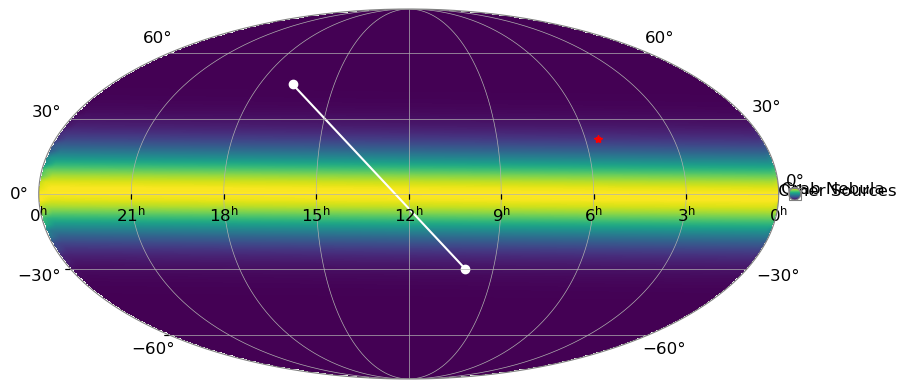

In [1]:
import numpy as np
from gwexpy.plot import SkyMap
import matplotlib.pyplot as plt

# Create SkyMap with Mollweide projection (default)
fig = SkyMap(figsize=(10, 5))

# Add synthetic HEALPix data if ligo.skymap is available
try:
    import ligo.skymap
    nside = 16
    npix = 12 * nside**2
    # Generate a dummy central peak
    map_data = np.exp(-0.5 * (np.arange(npix) - npix//2)**2 / (npix//10)**2)
    fig.add_healpix(map_data, cmap='viridis')
except ImportError:
    print("ligo.skymap not installed.")

# Mark some astronomical targets
# Crab Nebula (RA: 83.63 deg, Dec: 22.01 deg)
fig.mark_target(83.63, 22.01, label="Crab Nebula", color='red', marker='*')

# Other targets
fig.mark_target([150, 250], [-30, 45], label="Other Sources", color='white', marker='o')

plt.show()

## 2. GeoMap: Geographic Maps with PyGMT

`GeoMap` provides a Cartopy-like interface to `PyGMT`, allowing for high-quality geographic maps and easy placement of gravitational wave detectors.

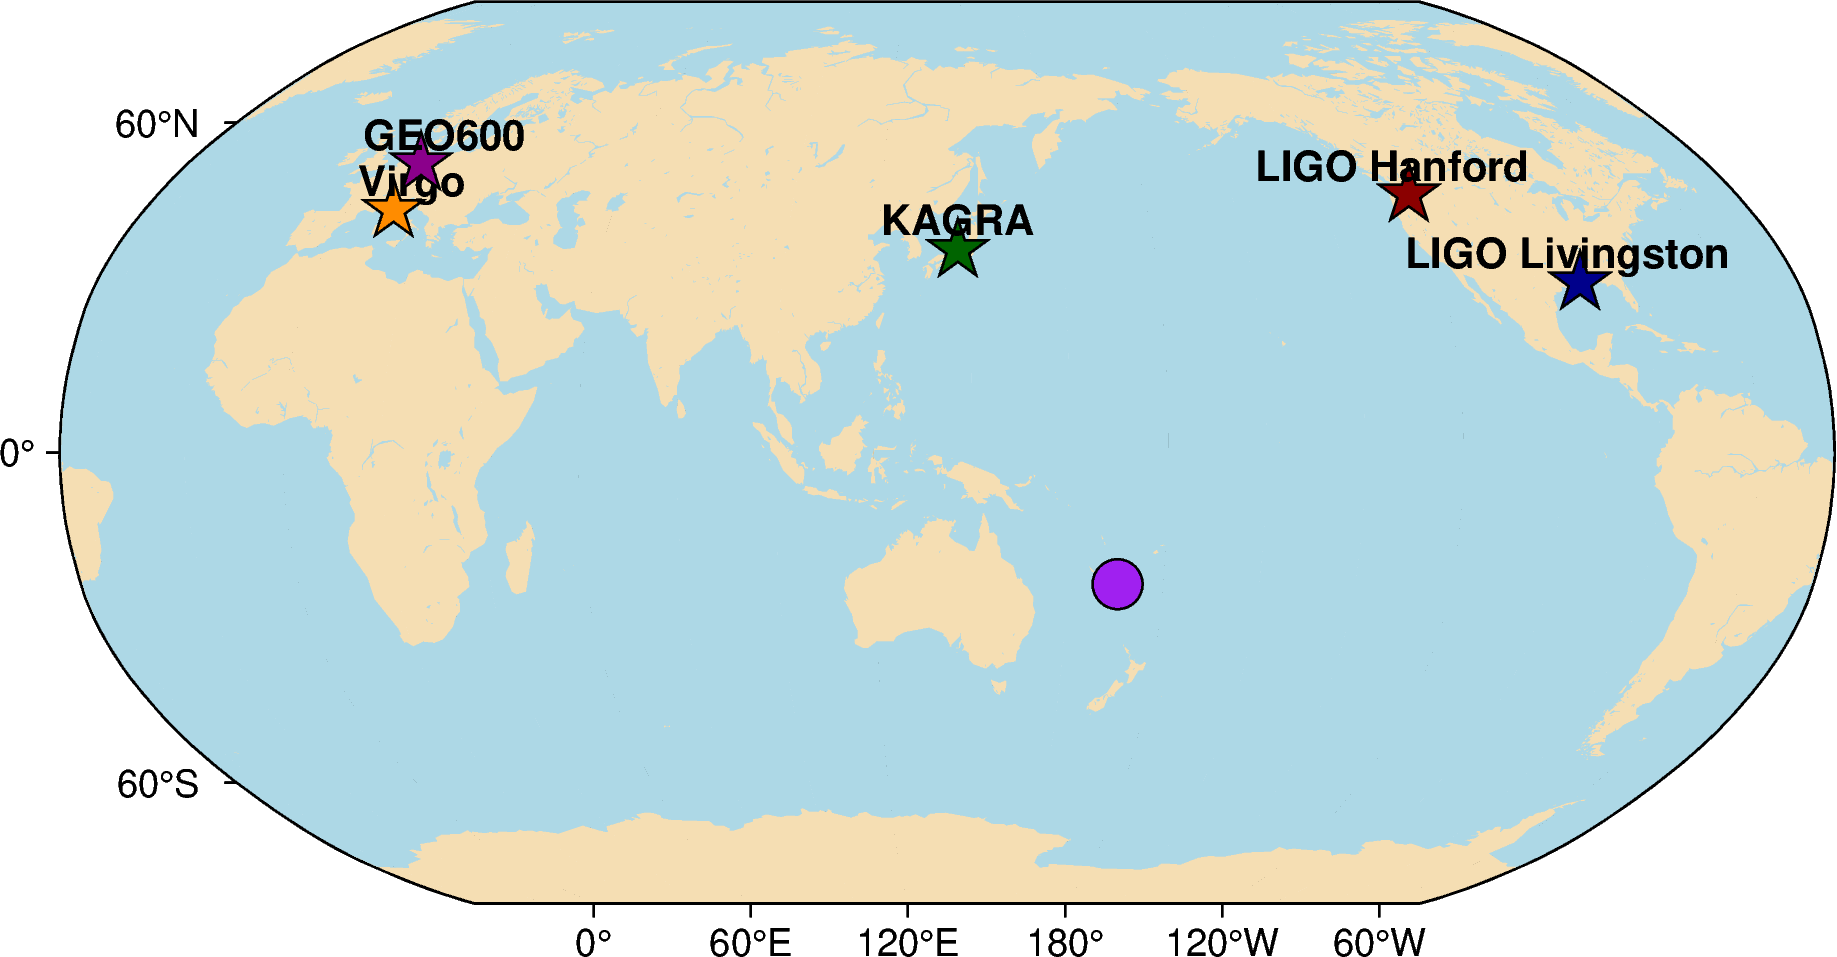

In [2]:
from gwexpy.plot import GeoMap

# GeoMap を作成 with Robinson projection centered on 135E (Japan)
try:
    gmap = GeoMap(projection='Robinson', center_lon=135)

    # Add map features
    gmap.add_coastlines(resolution='low', color='black')
    gmap.fill_continents(color='wheat')
    gmap.fill_oceans(color='lightblue')

    # Plot standard detectors (KAGRA, LIGO, Virgo, GEO)
    for det in ['K1', 'H1', 'L1', 'V1', 'G1']:
        gmap.plot_detector(det, label=True)

    # Plot an arbitrary point
    gmap.plot(x=170.5, y=-23.6, marker='o', color='purple', markersize=12)

    gmap.show()
except ImportError as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")

## 3. 日本周辺のクローズアップ表示

`GeoMap` では、`region` 引数に ISO 3166-1 alpha-2 国コード（'JP', 'US' など）を指定することで、その国周辺を自動的にクローズアップして表示できます。
また、`add_scale_bar()` を使うことで、地図上に縮尺バーを追加できます。

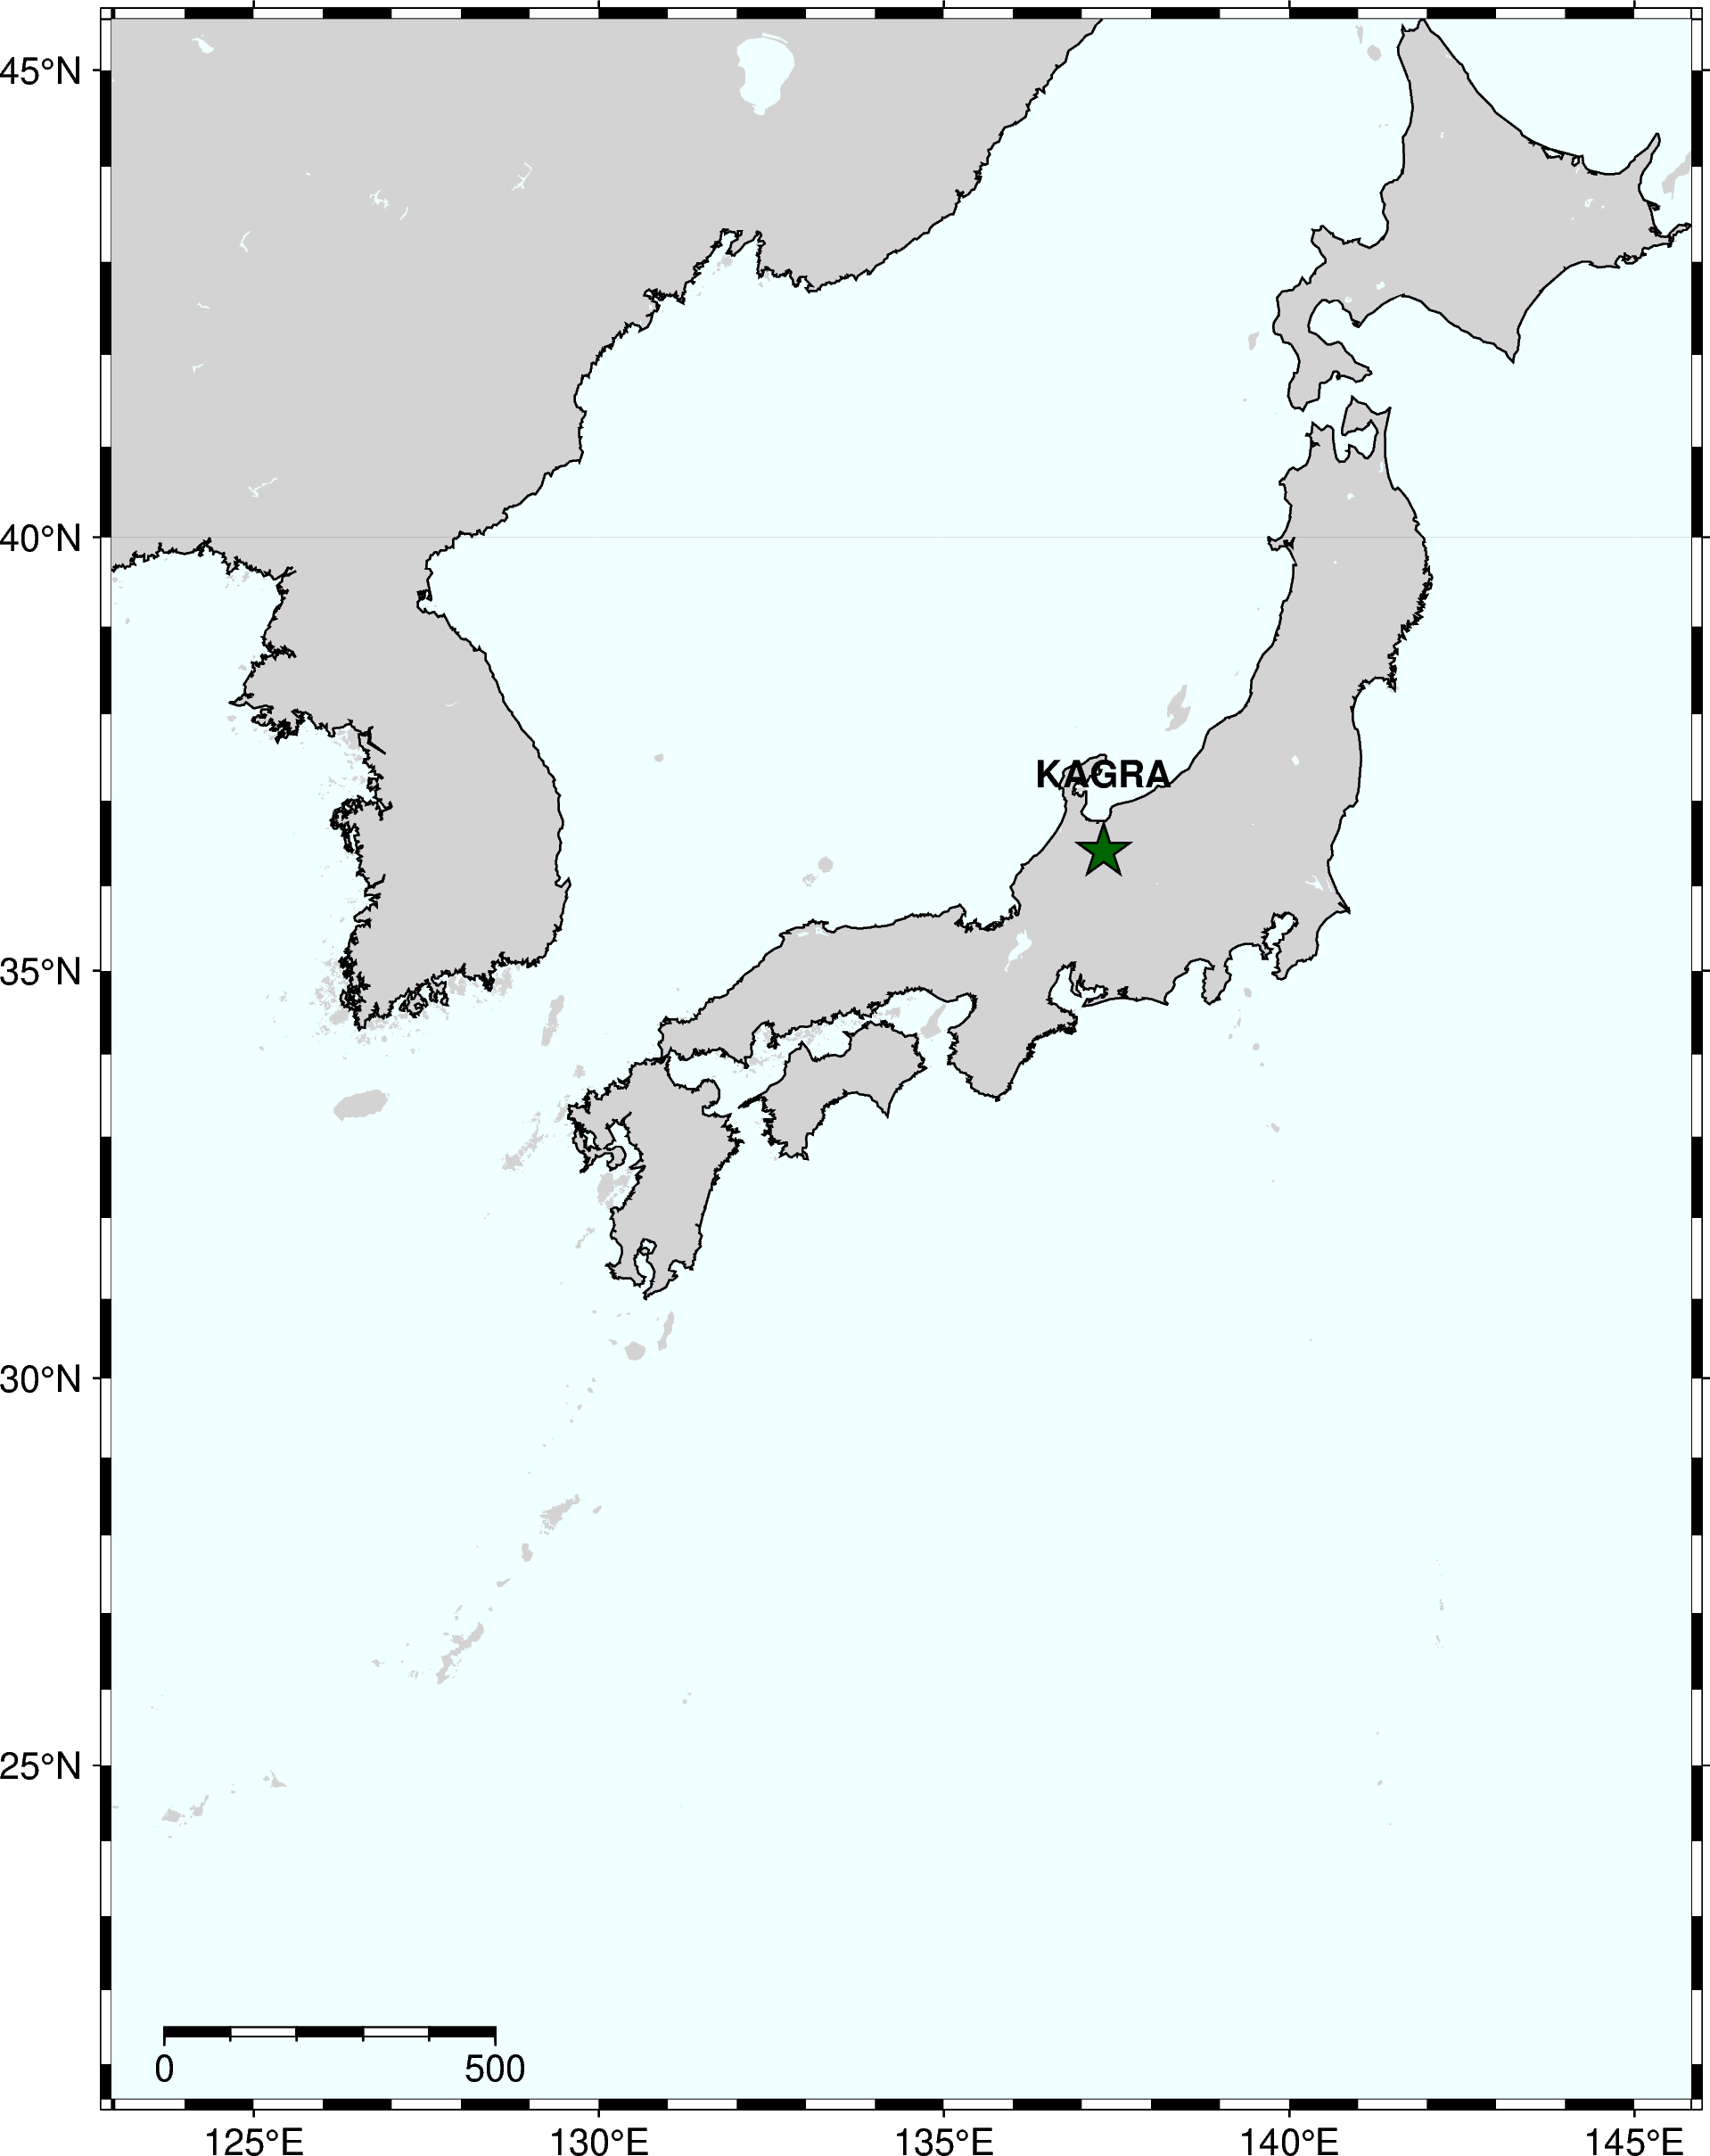

In [3]:
from gwexpy.plot import GeoMap

# 日本周辺を表示 (region='JP' を指定)
# 拡大表示のため Mercator 投影法を使用し、枠線を詳しく表示 (frame='afg')
geo_jp = GeoMap(projection='Mercator', region='JP', frame='afg')

geo_jp.fill_oceans(color='azure')
geo_jp.fill_continents(color='lightgray')
geo_jp.add_coastlines(resolution='medium') # 解像度を上げて海岸線を描画

# KAGRA 検出器をプロット
geo_jp.plot_detector('K1')

# 縮尺バーを追加 (500km 幅、左下に 0.5cm オフセット)
geo_jp.add_scale_bar(width='500k', position='jBL', offset='0.5c/0.5c')

geo_jp.show()

### よく使われる ISO 国コード (alpha-2)

| 国名 | ISO コード | 備考 |
| :--- | :--- | :--- |
| 日本 | `JP` | KAGRA が所在 |
| アメリカ合衆国 | `US` | LIGO (Hanford, Livingston) が所在 |
| イタリア | `IT` | Virgo が所在 |
| ドイツ | `DE` | GEO600 が所在 |
| インド | `IN` | LIGO-India 建設予定 |
| オーストラリア | `AU` | |
| イギリス | `GB` | |